In [161]:
import pandas as pd
#import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

In [162]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
#from common.utils import load_data, mape

In [163]:
from google.colab import drive

In [164]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [165]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [166]:
dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_deaths_global.csv')


In [167]:
dataf= pd.DataFrame(dataset)
col = list(dataset.columns.values)
col_value = (list(dataf.sum(axis = 0, skipna = True)))
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])
data = df1.drop(df1.index)
print(df1)

              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                         5603.37955
2               Lat                                        6057.329414
3              Long                                                 17
4           1/22/20                                                 18
..              ...                                                ...
719          1/6/22                                            5480300
720          1/7/22                                            5485330
721          1/8/22                                            5489287
722          1/9/22                                            5495713
723         1/10/22                                            5504387

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
col1 = list(df1.columns.values)
print(col1)
df1 = df1.drop(0) 
df1 = df1.drop(1) 
df1 = df1.drop(2) 
df1 = df1.drop(3) 
df1 = df1.drop(723) 
df1

['Title', 'Values']


,Title,Values
4,1/22/20,18
5,1/23/20,26
6,1/24/20,42
7,1/25/20,56
8,1/26/20,82
...,...,...
718,1/5/22,5473031
719,1/6/22,5480300
720,1/7/22,5485330
721,1/8/22,5489287


In [169]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

dates = df1['Title']
date_format = [pd.to_datetime(d) for d in dates]
date_time = [date_format[d].strftime("%d-%m-%Y") for d in range(719)]
#str_date_time = date_format[0].strftime("%d-%m-%Y %H:%M:%S")
#df1.set_index('Title',inplace=True)

In [170]:
#print(date_format)
#df1.set_index(date_time,inplace=True)
df1['Time'] = date_time
print(df1)

       Title   Values        Time
4    1/22/20       18  22-01-2020
5    1/23/20       26  23-01-2020
6    1/24/20       42  24-01-2020
7    1/25/20       56  25-01-2020
8    1/26/20       82  26-01-2020
..       ...      ...         ...
718   1/5/22  5473031  05-01-2022
719   1/6/22  5480300  06-01-2022
720   1/7/22  5485330  07-01-2022
721   1/8/22  5489287  08-01-2022
722   1/9/22  5495713  09-01-2022

[719 rows x 3 columns]


In [171]:
df1.set_index('Time',inplace=True)

In [172]:
df1

,Title,Values
Time,,
22-01-2020,1/22/20,18
23-01-2020,1/23/20,26
24-01-2020,1/24/20,42
25-01-2020,1/25/20,56
26-01-2020,1/26/20,82
...,...,...
05-01-2022,1/5/22,5473031
06-01-2022,1/6/22,5480300
07-01-2022,1/7/22,5485330


In [173]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   719 non-null    object
 1   Values  719 non-null    object
dtypes: object(2)
memory usage: 16.9+ KB


In [174]:
df1.index.freq='MS'

In [175]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   719 non-null    object
 1   Values  719 non-null    object
dtypes: object(2)
memory usage: 16.9+ KB


In [176]:
df1["Values"] = df1["Values"].astype('int')

In [177]:
del df1['Title']

In [178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  719 non-null    int64
dtypes: int64(1)
memory usage: 11.2+ KB


In [179]:
df1.index.freq='MS'

In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 719 entries, 22-01-2020 to 09-01-2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Values  719 non-null    int64
dtypes: int64(1)
memory usage: 11.2+ KB


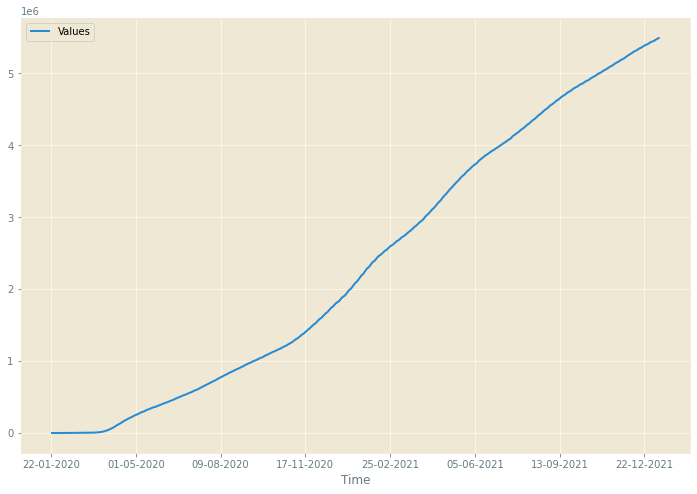

In [181]:
df1.plot(figsize=(12,8))

In [182]:
train = df1.iloc[:600]

In [183]:
test = df1.iloc[601:]

In [184]:
len(test)

118

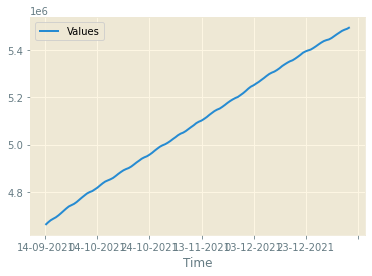

In [185]:
test.plot()

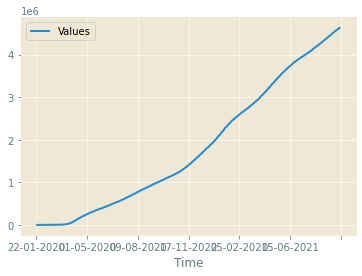

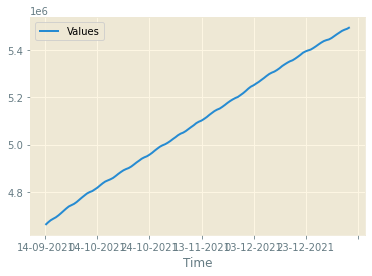

In [186]:
train.plot()
test.plot()

In [187]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [188]:
data = np.array(df1["Values"])

In [ ]:
np.asarray(data)

In [190]:
#data = train["Values"].astype('int')

In [191]:
#df1.index = pd.DatetimeIndex(df1.index).to_period('M')

In [192]:
#test.index = pd.DatetimeIndex(test.index).to_period('M')

In [193]:
#train.index = pd.DatetimeIndex(train.index).to_period('M')

In [194]:
model = ExponentialSmoothing(train['Values'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


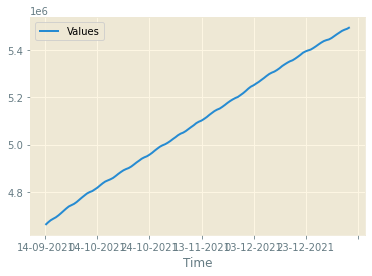

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


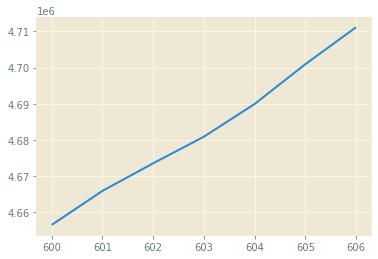

In [195]:
test.plot()
plt.show()
model.forecast(7).plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


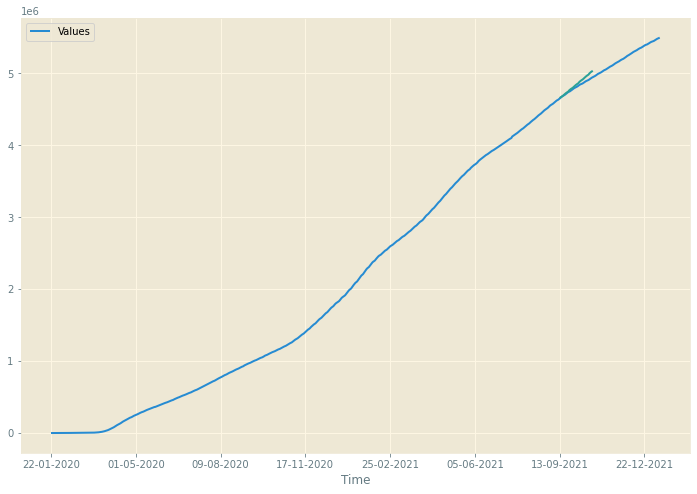

In [196]:
df1.plot(figsize=(12,8))
model.forecast(40).plot()

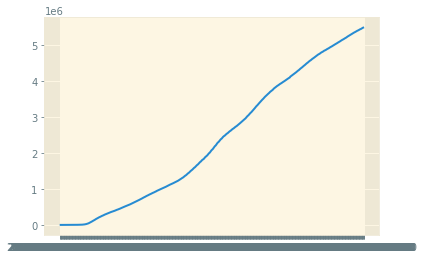

In [18]:
#today = datetime.date.today()
plt.figure()
plt.plot(df1.index,df1['Values'])

In [23]:
SimpleExpSmoothing("df1").fit(smoothing_level=0.1)

ValueError: ignored

In [27]:
data = df1["Values"].tolist()
index= pd.date_range(start='05-01-2020 00:00:00', end='01-02-2020 00:00:00', freq='B')
stock_data = pd.Series(data, index)
forecast_timestep = 2

ValueError: ignored